# Importing libraries

In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Loading .csv

In [229]:
who = pd.read_csv('who.csv')

In [230]:
who

,Unnamed: 0,country,status,life expectancy,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,hiv/aids,thinness 1-19 years,income composition of resources,schooling
0,0,Afghanistan,1.0,58.19375,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,48.3750,8.252500,0.10000,16.58125,0.415375,8.21250
1,1,Albania,1.0,75.15625,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,98.1250,5.945625,0.10000,1.61875,0.709875,12.13750
2,2,Algeria,1.0,73.61875,20.3125,0.615938,236.185241,81.5000,1943.8750,48.74375,91.7500,4.675937,0.10000,6.09375,0.694875,12.71250
3,3,Angola,1.0,49.01875,83.7500,5.616562,102.100268,79.7500,3561.3125,18.01875,46.1250,4.034063,2.36875,6.19375,0.458375,8.04375
4,4,Antigua and Barbuda,1.0,75.05625,0.0000,7.687188,1001.585226,97.8750,0.0000,38.42500,96.9375,4.851562,0.12500,3.42500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,187,Venezuela,1.0,73.38750,9.3750,7.190938,0.000000,66.2500,165.0000,54.48750,74.6875,5.045937,0.10000,1.65000,0.726812,12.78750
188,188,Vietnam,1.0,74.77500,29.1875,3.129062,0.000000,88.3750,4232.9375,11.18750,94.9375,5.963438,0.14375,14.92500,0.627062,11.51250
189,189,Yemen,1.0,63.86250,39.3750,0.279062,0.000000,55.6875,2761.1875,33.48750,67.1250,5.052188,0.10000,13.83125,0.475500,8.50625
190,190,Zambia,1.0,53.90625,33.4375,2.334062,89.650407,76.7500,6563.8125,17.45000,64.3750,5.819687,11.93125,6.88125,0.498437,11.21250


In [231]:
len(who.columns)

16

In [232]:
type(who)

pandas.core.frame.DataFrame

In [233]:
who = who.drop(['Unnamed: 0'], axis=1)

In [234]:
who.head()

,country,status,life expectancy,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,hiv/aids,thinness 1-19 years,income composition of resources,schooling
0,Afghanistan,1.0,58.19375,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,48.3750,8.252500,0.10000,16.58125,0.415375,8.21250
1,Albania,1.0,75.15625,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,98.1250,5.945625,0.10000,1.61875,0.709875,12.13750
2,Algeria,1.0,73.61875,20.3125,0.615938,236.185241,81.5000,1943.8750,48.74375,91.7500,4.675937,0.10000,6.09375,0.694875,12.71250
3,Angola,1.0,49.01875,83.7500,5.616562,102.100268,79.7500,3561.3125,18.01875,46.1250,4.034063,2.36875,6.19375,0.458375,8.04375
4,Antigua and Barbuda,1.0,75.05625,0.0000,7.687188,1001.585226,97.8750,0.0000,38.42500,96.9375,4.851562,0.12500,3.42500,0.488625,8.84375


# Dividing categoricals/numericals

In [235]:
who_categoricals = who['country']

In [236]:
who_categoricals.info()

<class 'pandas.core.series.Series'>
RangeIndex: 192 entries, 0 to 191
Series name: country
Non-Null Count  Dtype 
--------------  ----- 
192 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [237]:
who_numericals = who._get_numeric_data()

In [238]:
who_numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   status                           192 non-null    float64
 1   life expectancy                  192 non-null    float64
 2   infant deaths                    192 non-null    float64
 3   alcohol                          192 non-null    float64
 4   percentage expenditure           192 non-null    float64
 5   hepatitis b                      192 non-null    float64
 6   measles                          192 non-null    float64
 7   bmi                              192 non-null    float64
 8   polio                            192 non-null    float64
 9   total expenditure                192 non-null    float64
 10  hiv/aids                         192 non-null    float64
 11  thinness 1-19 years              192 non-null    float64
 12  income composition of 

# Linear Regression

## Defining X1, y1

In [239]:
X1 = who_numericals

In [240]:
who_numericals

,status,life expectancy,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,hiv/aids,thinness 1-19 years,income composition of resources,schooling
0,1.0,58.19375,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,48.3750,8.252500,0.10000,16.58125,0.415375,8.21250
1,1.0,75.15625,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,98.1250,5.945625,0.10000,1.61875,0.709875,12.13750
2,1.0,73.61875,20.3125,0.615938,236.185241,81.5000,1943.8750,48.74375,91.7500,4.675937,0.10000,6.09375,0.694875,12.71250
3,1.0,49.01875,83.7500,5.616562,102.100268,79.7500,3561.3125,18.01875,46.1250,4.034063,2.36875,6.19375,0.458375,8.04375
4,1.0,75.05625,0.0000,7.687188,1001.585226,97.8750,0.0000,38.42500,96.9375,4.851562,0.12500,3.42500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1.0,73.38750,9.3750,7.190938,0.000000,66.2500,165.0000,54.48750,74.6875,5.045937,0.10000,1.65000,0.726812,12.78750
188,1.0,74.77500,29.1875,3.129062,0.000000,88.3750,4232.9375,11.18750,94.9375,5.963438,0.14375,14.92500,0.627062,11.51250
189,1.0,63.86250,39.3750,0.279062,0.000000,55.6875,2761.1875,33.48750,67.1250,5.052188,0.10000,13.83125,0.475500,8.50625
190,1.0,53.90625,33.4375,2.334062,89.650407,76.7500,6563.8125,17.45000,64.3750,5.819687,11.93125,6.88125,0.498437,11.21250


In [241]:
X1 = X1.drop(['life expectancy'], axis=1)

In [242]:
#X1 = X1.drop(['status'], axis=1)

In [243]:
X1

,status,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,hiv/aids,thinness 1-19 years,income composition of resources,schooling
0,1.0,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,48.3750,8.252500,0.10000,16.58125,0.415375,8.21250
1,1.0,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,98.1250,5.945625,0.10000,1.61875,0.709875,12.13750
2,1.0,20.3125,0.615938,236.185241,81.5000,1943.8750,48.74375,91.7500,4.675937,0.10000,6.09375,0.694875,12.71250
3,1.0,83.7500,5.616562,102.100268,79.7500,3561.3125,18.01875,46.1250,4.034063,2.36875,6.19375,0.458375,8.04375
4,1.0,0.0000,7.687188,1001.585226,97.8750,0.0000,38.42500,96.9375,4.851562,0.12500,3.42500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1.0,9.3750,7.190938,0.000000,66.2500,165.0000,54.48750,74.6875,5.045937,0.10000,1.65000,0.726812,12.78750
188,1.0,29.1875,3.129062,0.000000,88.3750,4232.9375,11.18750,94.9375,5.963438,0.14375,14.92500,0.627062,11.51250
189,1.0,39.3750,0.279062,0.000000,55.6875,2761.1875,33.48750,67.1250,5.052188,0.10000,13.83125,0.475500,8.50625
190,1.0,33.4375,2.334062,89.650407,76.7500,6563.8125,17.45000,64.3750,5.819687,11.93125,6.88125,0.498437,11.21250


In [244]:
y1 = who_numericals['life expectancy']

In [245]:
y1

0      58.19375
1      75.15625
2      73.61875
3      49.01875
4      75.05625
         ...   
187    73.38750
188    74.77500
189    63.86250
190    53.90625
191    50.48750
Name: life expectancy, Length: 192, dtype: float64

## Data splitting

In [246]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

X1_train = pd.DataFrame(X1_train, columns=X1.columns)
X1_test  = pd.DataFrame(X1_test, columns=X1.columns)

## Standardizing Data

array([[<AxesSubplot:title={'center':'status'}>,
        <AxesSubplot:title={'center':'infant deaths'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'percentage expenditure'}>],
       [<AxesSubplot:title={'center':'hepatitis b'}>,
        <AxesSubplot:title={'center':'measles'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'polio'}>],
       [<AxesSubplot:title={'center':'total expenditure'}>,
        <AxesSubplot:title={'center':'hiv/aids'}>,
        <AxesSubplot:title={'center':'thinness 1-19 years'}>,
        <AxesSubplot:title={'center':'income composition of resources'}>],
       [<AxesSubplot:title={'center':'schooling'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

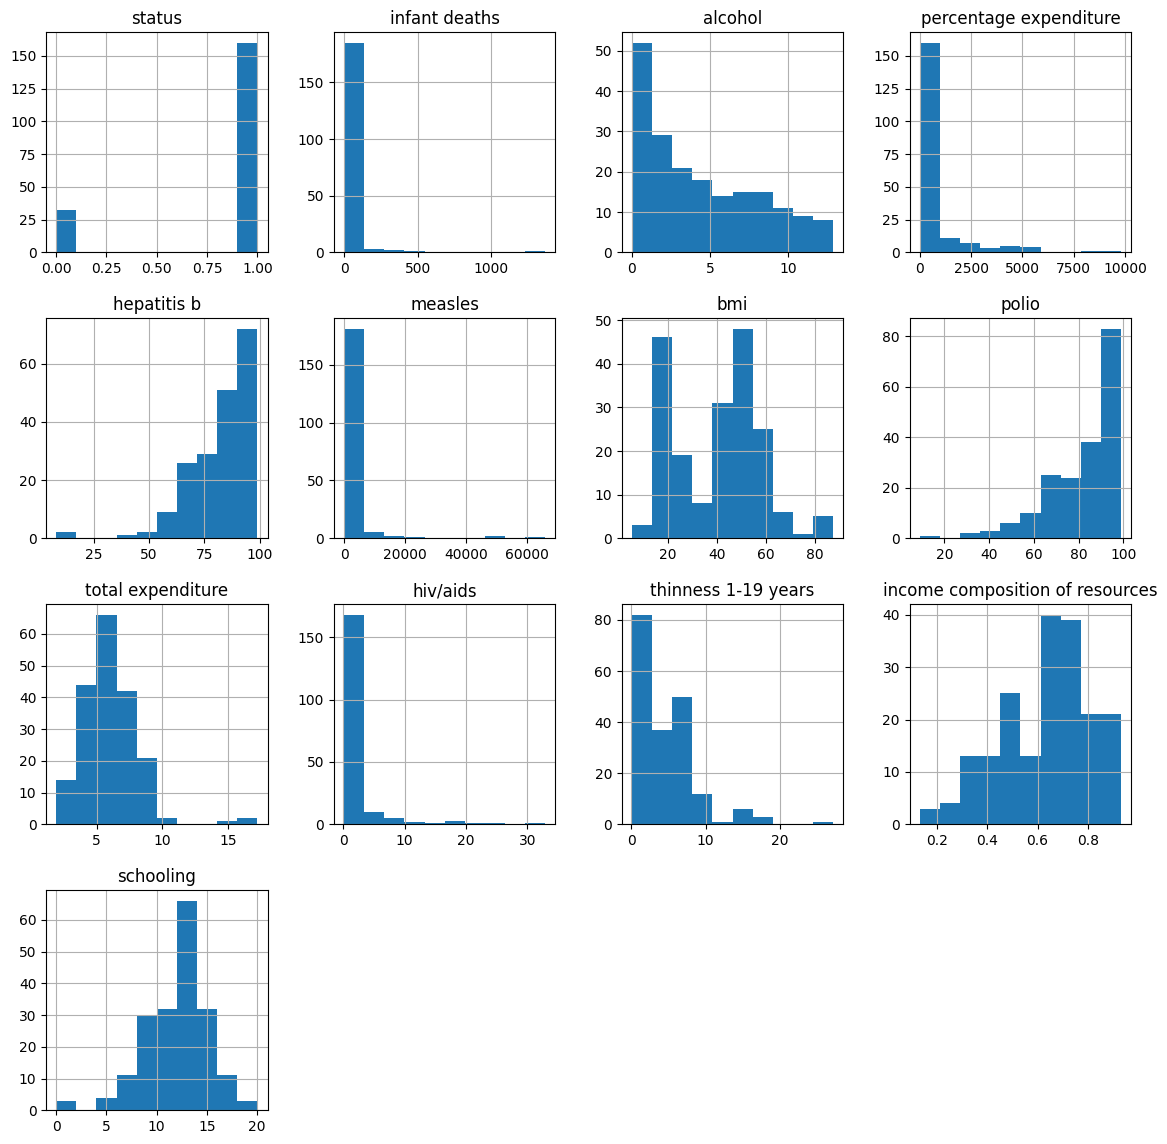

In [247]:
 X1.hist(figsize=(14,14))

In [248]:
std_scaler=StandardScaler().fit(X1_train)   

X1_train_scaled=std_scaler.transform(X1_train)



In [249]:
X1_test_scaled=std_scaler.transform(X1_test)

## Fitting model



In [250]:
model1=LinearRegression()    
model1.fit(X1_train_scaled, y1_train)

LinearRegression()

## Feature importance (FI)


### FI (numerical)

In [251]:
feature_names1 = X1_train.columns
feature_names1 = list(feature_names1)

In [252]:
df1 = pd.DataFrame(list(zip(feature_names1, abs(model1.coef_))))
df1.columns = ['columns_name', 'score_feature_importance']
df1.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
9,hiv/aids,3.302840
7,polio,2.769611
11,income composition of resources,2.615962
6,bmi,1.664782
4,hepatitis b,1.117014
12,schooling,1.009324
3,percentage expenditure,0.936234
0,status,0.711110
8,total expenditure,0.481385
2,alcohol,0.369812


### FI (visual)

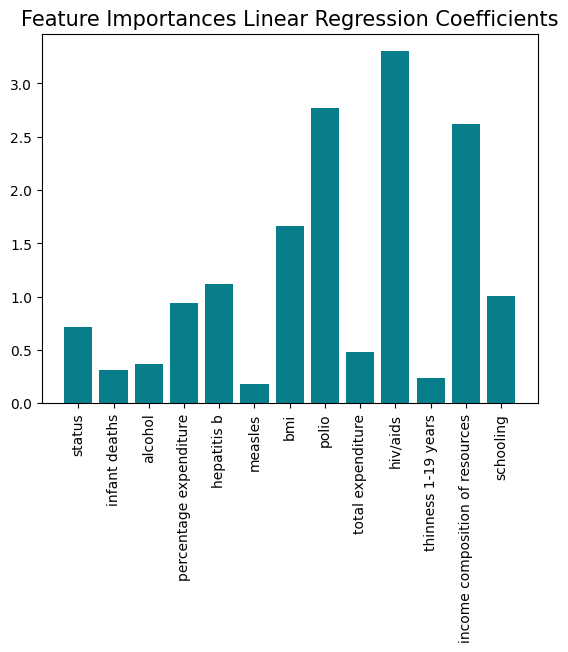

In [369]:
plt.bar(x=df1['columns_name'], height=df1['score_feature_importance'], color='#087E8B')
plt.title('Feature Importances Linear Regression Coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

## Making prediction

In [254]:
y1_pred=model1.predict(X1_test_scaled)   

y1_pred_train=model1.predict(X1_train_scaled)

## Evaluating model performance 

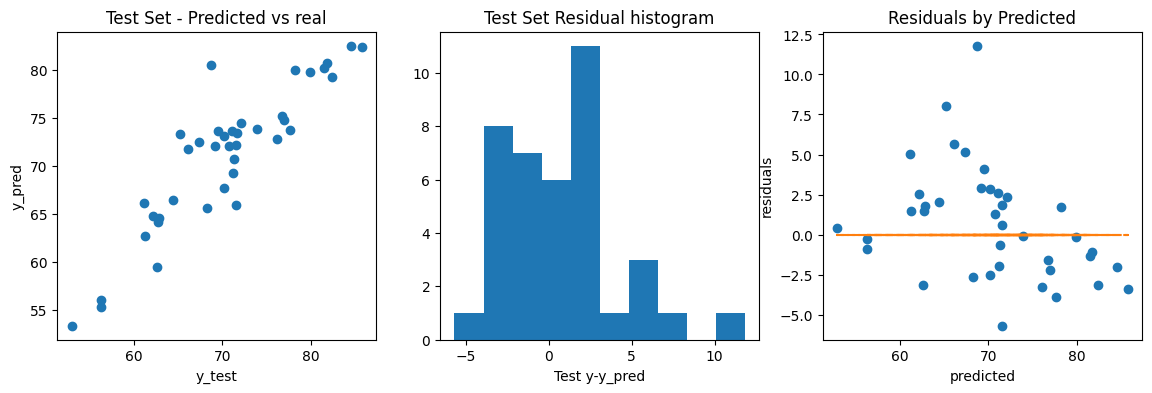

In [255]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y1_pred, y1_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y1_test - y1_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y1_pred,y1_test - y1_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y1_pred,np.zeros(len(y1_pred)),linestyle='dashed')

## Error metrics

In [256]:
print(mse(y1_test,y1_pred))
print(mae(y1_test,y1_pred))

12.369063205026105
2.7112650370694182


In [257]:
R2_1=r2_score(y1_test,y1_pred)
R2_1

0.7671156394917041

## Cross validation

In [258]:
scores1=cross_val_score(model1, X1_train_scaled, y1_train, cv = 5)
scores1

array([0.87961097, 0.78521754, 0.783813  , 0.70549627, 0.85421262])

In [259]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))

0.80 accuracy with a standard deviation of 0.06


# Linear Regression, Random Feature Elimination

## Defining X2, y2 (RFE)

In [260]:
X2 = X1

In [261]:
y2 = y1

## Data splitting (X2, y2)

In [262]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)

X2_train = pd.DataFrame(X2_train, columns=X2.columns)
X2_test  = pd.DataFrame(X2_test, columns=X2.columns)

## Recursive Feature Elimination (X2, y2)

In [263]:
lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 17, step = 1, verbose = 1)
selector.fit(X2_train, y2_train)

kept_features = selector.get_support(indices = True) 
kept_features = list(X2_train.iloc[:,kept_features].columns)

X2_train_RFE = selector.transform(X2_train)
X2_test_RFE  = selector.transform(X2_test)

X2_train_RFE = pd.DataFrame(X2_train_RFE, columns=kept_features)
X2_test_RFE  = pd.DataFrame(X2_test_RFE, columns=kept_features)

print("Final selected features: ")
display(X2_train_RFE)

Final selected features: 


,status,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,hiv/aids,thinness 1-19 years,income composition of resources,schooling
0,0.0,2.8750,6.835312,3923.050329,92.0000,6875.8125,25.60625,96.0000,6.427812,0.10000,1.81250,0.876563,14.97500
1,1.0,1.0000,9.183438,0.000000,95.0000,390.8750,43.90625,94.9375,6.881563,0.10000,3.02500,0.677000,12.30000
2,1.0,64.6250,1.601562,97.698443,78.5000,3108.0000,43.50000,72.2500,5.699063,0.25000,3.30000,0.441000,6.37500
3,1.0,13.8750,4.377813,516.640179,79.0000,9.5000,49.54375,84.2500,6.303438,0.10000,2.30000,0.681875,12.23125
4,0.0,2.2500,9.608438,310.682268,97.3750,47.4375,53.73125,96.7500,6.340313,0.10000,2.20625,0.813187,15.25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1.0,0.0000,2.959687,422.239524,96.1875,54.3125,25.98125,96.5000,4.601562,0.10625,7.46875,0.722625,13.53125
149,1.0,0.5625,12.888438,329.046455,88.9375,24.8125,54.74375,89.8750,6.164688,0.10000,2.21250,0.743250,14.75000
150,1.0,4.5000,2.190937,82.118913,76.7500,266.6875,25.23750,67.9375,7.491562,22.96875,7.18750,0.456813,10.65625
151,1.0,89.6875,7.782188,47.692108,67.0000,12394.6250,15.52500,65.4375,8.367812,7.65000,6.26250,0.445312,10.59375


## Standardizing Data (X2, y2)

In [264]:
std_scaler=StandardScaler().fit(X2_train_RFE)   

X2_train_scaled=std_scaler.transform(X2_train_RFE)


In [265]:
X2_test_scaled=std_scaler.transform(X2_test_RFE)

## Fitting model (Linear Regression, X2, y2, RFE)

In [266]:
model2=LinearRegression()    
model2.fit(X2_train_scaled, y2_train)

LinearRegression()

## Feature importance (FI)


### FI (numerical)

In [267]:
feature_names2 = X2_train.columns
feature_names2 = list(feature_names2)

In [268]:
df2 = pd.DataFrame(list(zip(feature_names2, abs(model2.coef_))))
df2.columns = ['columns_name', 'score_feature_importance']
df2.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
9,hiv/aids,3.302840
7,polio,2.769611
11,income composition of resources,2.615962
6,bmi,1.664782
4,hepatitis b,1.117014
12,schooling,1.009324
3,percentage expenditure,0.936234
0,status,0.711110
8,total expenditure,0.481385
2,alcohol,0.369812


### FI (visual)

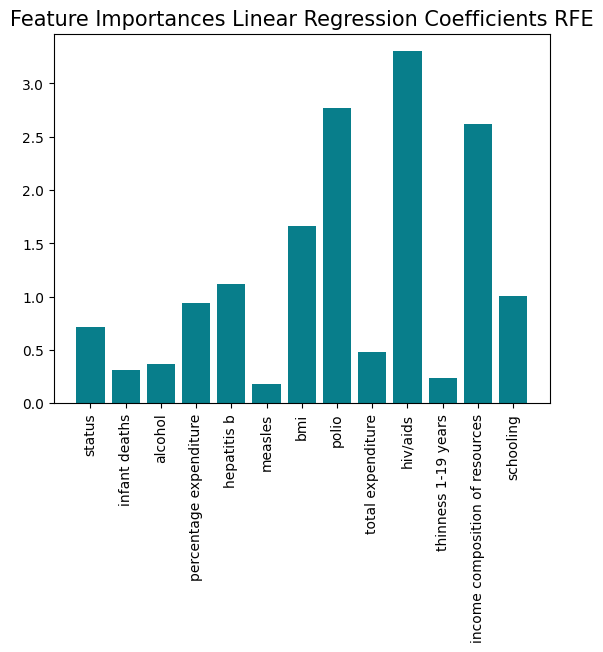

In [371]:
plt.bar(x=df2['columns_name'], height=df2['score_feature_importance'], color='#087E8B')
plt.title('Feature Importances Linear Regression Coefficients RFE', size=15)
plt.xticks(rotation='vertical')
plt.show()

## Making prediction (X2, y2)

In [270]:
y2_pred=model2.predict(X2_test_scaled)   

y2_pred_train=model2.predict(X2_train_scaled)

## Evaluating model performance (X2, y2)

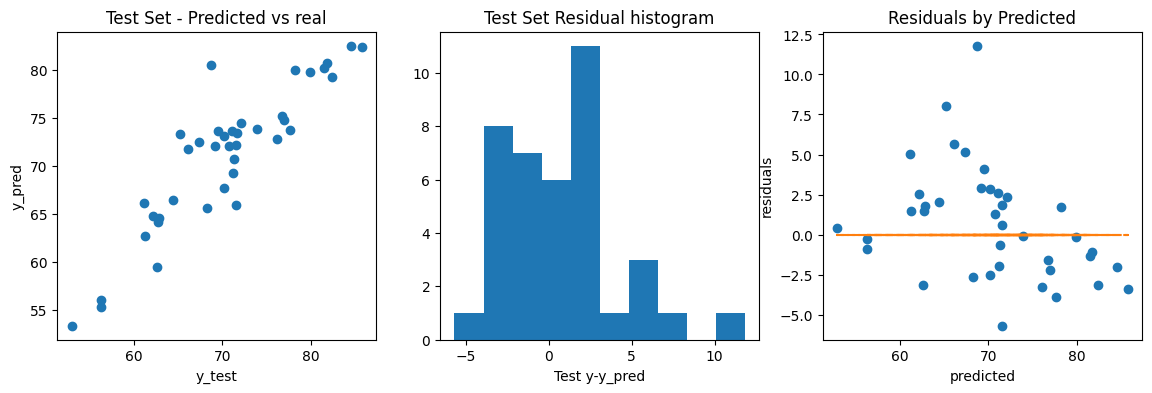

In [271]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y2_pred, y2_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y2_test - y2_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y2_pred,y2_test - y2_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y2_pred,np.zeros(len(y2_pred)),linestyle='dashed')

## Error metrics (X2, y2)

In [272]:
print(mse(y2_test,y2_pred))
print(mae(y2_test,y2_pred))

12.369063205026105
2.7112650370694182


In [273]:
R2_2=r2_score(y2_test,y2_pred)
R2_2

0.7671156394917041

## Cross validation (X2, y2)

In [274]:
scores2=cross_val_score(model2, X2_train, y2_train, cv = 5)
scores2

array([0.87961097, 0.78521754, 0.783813  , 0.70549627, 0.85421262])

In [275]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))

0.80 accuracy with a standard deviation of 0.06


# KNN Regression

## Defining X3, y3 

In [276]:
X3 = X2

In [277]:
y3 = y2

## Data splitting (X3, y3)

In [278]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=42)

X3_train = pd.DataFrame(X3_train, columns=X3.columns)
X3_test  = pd.DataFrame(X3_test, columns=X3.columns)

## Recursive Feature Elimination (X3, y3)

In [279]:
lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 17, step = 1, verbose = 1)
selector.fit(X3_train, y3_train)

kept_features = selector.get_support(indices = True) 
kept_features = list(X3_train.iloc[:,kept_features].columns)

X3_train_RFE = selector.transform(X3_train)
X3_test_RFE  = selector.transform(X3_test)

X3_train_RFE = pd.DataFrame(X3_train_RFE, columns=kept_features)
X3_test_RFE  = pd.DataFrame(X3_test_RFE, columns=kept_features)

print("Final selected features: ")
display(X3_train_RFE)

Final selected features: 


,status,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,polio,total expenditure,hiv/aids,thinness 1-19 years,income composition of resources,schooling
0,0.0,2.8750,6.835312,3923.050329,92.0000,6875.8125,25.60625,96.0000,6.427812,0.10000,1.81250,0.876563,14.97500
1,1.0,1.0000,9.183438,0.000000,95.0000,390.8750,43.90625,94.9375,6.881563,0.10000,3.02500,0.677000,12.30000
2,1.0,64.6250,1.601562,97.698443,78.5000,3108.0000,43.50000,72.2500,5.699063,0.25000,3.30000,0.441000,6.37500
3,1.0,13.8750,4.377813,516.640179,79.0000,9.5000,49.54375,84.2500,6.303438,0.10000,2.30000,0.681875,12.23125
4,0.0,2.2500,9.608438,310.682268,97.3750,47.4375,53.73125,96.7500,6.340313,0.10000,2.20625,0.813187,15.25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1.0,0.0000,2.959687,422.239524,96.1875,54.3125,25.98125,96.5000,4.601562,0.10625,7.46875,0.722625,13.53125
149,1.0,0.5625,12.888438,329.046455,88.9375,24.8125,54.74375,89.8750,6.164688,0.10000,2.21250,0.743250,14.75000
150,1.0,4.5000,2.190937,82.118913,76.7500,266.6875,25.23750,67.9375,7.491562,22.96875,7.18750,0.456813,10.65625
151,1.0,89.6875,7.782188,47.692108,67.0000,12394.6250,15.52500,65.4375,8.367812,7.65000,6.26250,0.445312,10.59375


## Power transforming data (X3, y3)

In [280]:
trans = PowerTransformer()
trans.fit(X3_train)

PowerTransformer()

In [281]:
X3_train_scaled = trans.transform(X3_train)
X3_test_scaled  = trans.transform(X3_test)

## Fitting model (KNN Regression, X3, y3)

In [282]:
model3 = KNeighborsRegressor(n_neighbors=2)

In [283]:
model3.fit(X3_train_scaled, y3_train)

KNeighborsRegressor(n_neighbors=2)

## Making prediction (X3, y3)

In [284]:
y3_pred_train = model3.predict(X3_train_scaled)
y3_pred  = model3.predict(X3_test_scaled)

## Evaluating model performance (X3, y3)

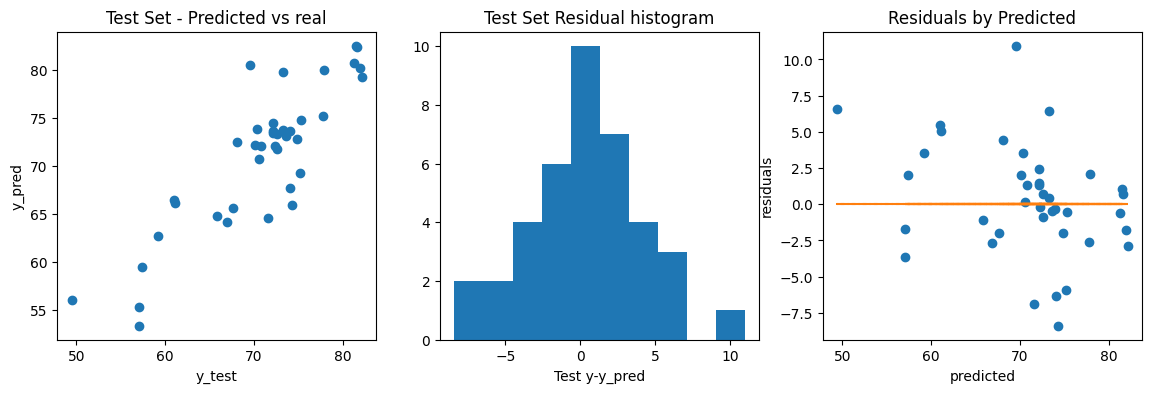

In [285]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y3_pred, y3_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y3_test - y3_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y3_pred,y3_test - y3_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y3_pred,np.zeros(len(y3_pred)),linestyle='dashed')

## Error metrics (X3, y3)

In [286]:
print(mse(y3_test,y3_pred))
print(mae(y3_test,y3_pred))

14.77009314903847
2.888141025641026


In [287]:
R2_3=r2_score(y3_test,y3_pred)
R2_3

0.7219091178817753

## Cross validation (X3, y3)

In [288]:
scores3=cross_val_score(model3, X3_train_scaled, y3_train, cv = 5)
scores3

array([0.86196252, 0.85334895, 0.85144437, 0.89397984, 0.86295718])

In [289]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))

0.86 accuracy with a standard deviation of 0.02


# Decision Tree Regression

## Defining X4, y4 

In [290]:
X4 = X3

In [291]:
y4 = y3

## Data splitting (X4, y4)

In [292]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.20, random_state=42)

X4_train = pd.DataFrame(X4_train, columns=X4.columns)
X4_test  = pd.DataFrame(X4_test, columns=X4.columns)

## Standardizing Data (X4, y4)

- Not needed because using decision tree

## Fitting model (Decision Tree Regression, X4, y4)

In [293]:
model4 = DecisionTreeRegressor(max_depth=3)

model4.fit(X4_train, y4_train)



DecisionTreeRegressor(max_depth=3)

## Feature importance (FI)


### FI (numerical)

In [294]:
feature_names4 = X4_train.columns
feature_names4 = list(feature_names2)

In [295]:
df4 = pd.DataFrame(list(zip(feature_names4, model4.feature_importances_)))
df4.columns = ['columns_name', 'score_feature_importance']
df4.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
9,hiv/aids,0.760505
11,income composition of resources,0.126713
5,measles,0.053757
12,schooling,0.046930
7,polio,0.012095
0,status,0.000000
1,infant deaths,0.000000
2,alcohol,0.000000
3,percentage expenditure,0.000000
4,hepatitis b,0.000000


### FI (visual)

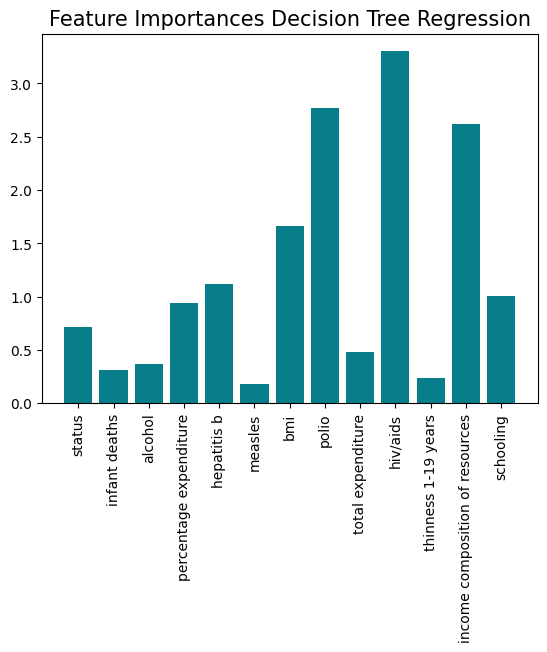

In [372]:
plt.bar(x=df4['columns_name'], height=df2['score_feature_importance'], color='#087E8B')
plt.title('Feature Importances Decision Tree Regression', size=15)
plt.xticks(rotation='vertical')
plt.show()

## Making prediction (X4, y4)

In [298]:
y4_pred_train = model4.predict(X4_train)
y4_pred  = model4.predict(X4_test)

## Evaluating model performance (X4, y4)

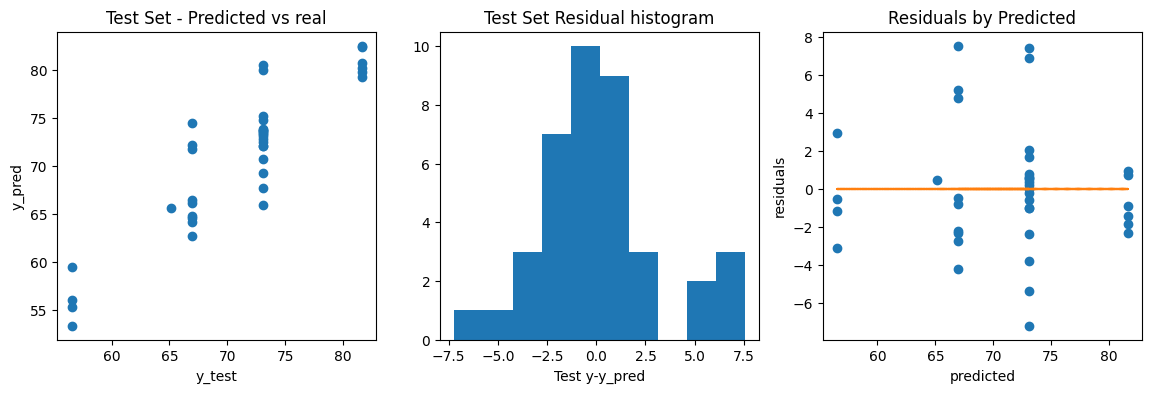

In [299]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y4_pred, y4_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y4_test - y4_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y4_pred,y4_test - y4_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y4_pred,np.zeros(len(y4_pred)),linestyle='dashed')

## Error metrics (X4, y4)

In [300]:
print(mse(y4_test,y4_pred))
print(mae(y4_test,y4_pred))

10.03816209433112
2.2940508021390373


In [301]:
R2_4=r2_score(y4_test,y4_pred)
R2_4

0.811001777477619

## Cross validation (X4, y4)

In [302]:
scores4=cross_val_score(model4, X4_train, y4_train, cv = 5)
scores4

array([0.65854531, 0.77017188, 0.69321879, 0.74387671, 0.82943422])

In [303]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores4.mean(), scores4.std()))

0.74 accuracy with a standard deviation of 0.06


# Random Forest Regression

## Defining X5, y5 (Random Forest Regression)

In [304]:
X5 = X4

In [305]:
y5 = y4

## Data splitting (X5, y5)

In [306]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.20, random_state=42)

X5_train = pd.DataFrame(X5_train, columns=X5.columns)
X5_test  = pd.DataFrame(X5_test, columns=X5.columns)

## Standardizing Data (X5, y5)

- Not needed because using decision tree

## Fitting model (Random Forest Regression, X5, y5)

In [307]:
model5 = RandomForestRegressor(n_estimators=100)

model5.fit(X5_train, y5_train)



RandomForestRegressor()

## Feature importance (FI)


### FI (numerical)

In [308]:
feature_names5 = X5_train.columns
feature_names5 = list(feature_names5)

In [309]:
df5 = pd.DataFrame(list(zip(feature_names5, model5.feature_importances_)))
df5.columns = ['columns_name', 'score_feature_importance']
df5.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
9,hiv/aids,0.665772
11,income composition of resources,0.116106
3,percentage expenditure,0.046535
12,schooling,0.040267
10,thinness 1-19 years,0.034418
5,measles,0.021876
6,bmi,0.019156
7,polio,0.016439
2,alcohol,0.011402
1,infant deaths,0.010308


### FI (visual)

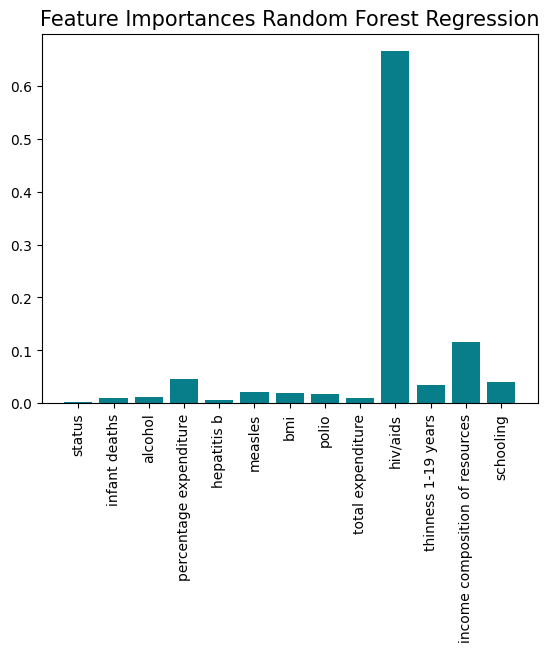

In [373]:
plt.bar(x=df5['columns_name'], height=df5['score_feature_importance'], color='#087E8B')
plt.title('Feature Importances Random Forest Regression', size=15)
plt.xticks(rotation='vertical')
plt.show()

## Making prediction (X5, y5)

In [311]:
y5_pred_train = model5.predict(X5_train)
y5_pred  = model5.predict(X5_test)

## Evaluating model performance (X5, y5)

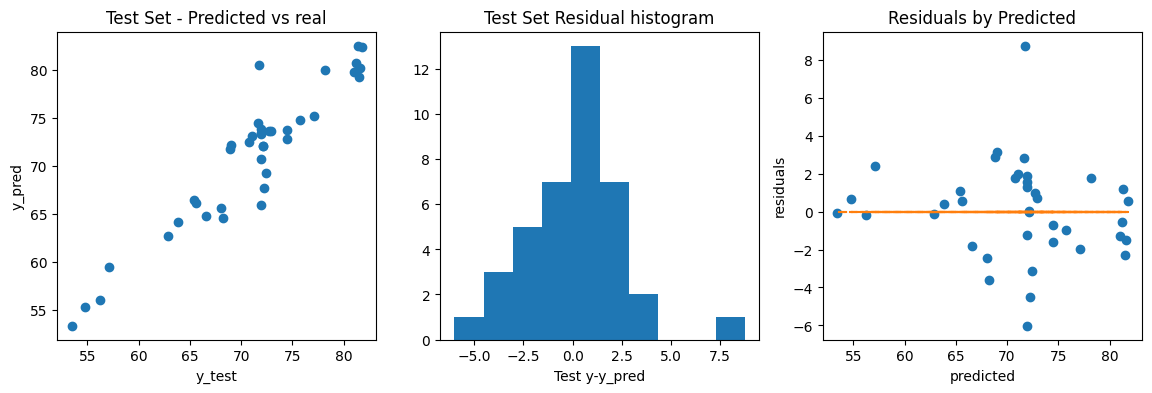

In [312]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y5_pred, y5_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y5_test - y5_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y5_pred,y5_test - y5_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y5_pred,np.zeros(len(y5_pred)),linestyle='dashed')

## Error metrics (X5, y5)

In [313]:
print(mse(y5_test,y5_pred))
print(mae(y5_test,y5_pred))

6.11449418927785
1.8017956730769236


In [314]:
R2_5=r2_score(y5_test,y5_pred)
R2_5

0.8848764821152308

## Cross validation (X5, y5)

In [315]:
scores5=cross_val_score(model5, X5_train, y5_train, cv = 10)
scores5

array([0.64418989, 0.87215033, 0.92877377, 0.9178756 , 0.83610367,
       0.88280531, 0.88400365, 0.777511  , 0.87853315, 0.805336  ])

In [316]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores5.mean(), scores5.std()))

0.84 accuracy with a standard deviation of 0.08


In [317]:
feature_names5 = X5_train.columns
feature_names5 = list(feature_names5)


In [318]:
df5 = pd.DataFrame(list(zip(feature_names5, model5.feature_importances_)))
df5.columns = ['columns_name', 'score_feature_importance']
df5.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
9,hiv/aids,0.665772
11,income composition of resources,0.116106
3,percentage expenditure,0.046535
12,schooling,0.040267
10,thinness 1-19 years,0.034418
5,measles,0.021876
6,bmi,0.019156
7,polio,0.016439
2,alcohol,0.011402
1,infant deaths,0.010308


# Random Forest Regression, Feature Selection

## Defining X6, y6

In [319]:
X6 = X5[['hiv/aids','income composition of resources','percentage expenditure']].copy()

In [320]:
y6 = y5

## Data splitting (X6, y6)

In [321]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.20, random_state=42)

X6_train = pd.DataFrame(X6_train, columns=X6.columns)
X6_test  = pd.DataFrame(X6_test, columns=X6.columns)

## Fitting model (Random Forest Regression, X6, y6 w/ Feature Selection X5, y5)

In [322]:
model6 = RandomForestRegressor(n_estimators=100)

model6.fit(X6_train, y6_train)



RandomForestRegressor()

## Feature importance (Random Forest Regression, X6, y6 w/ Feature Selection X5, y5)


- no need to do feature importance, only using three features from X5, y5

## Making prediction (X6, y6)

In [323]:
y6_pred_train = model6.predict(X6_train)
y6_pred  = model6.predict(X6_test)

## Evaluating model performance (X6, y6)

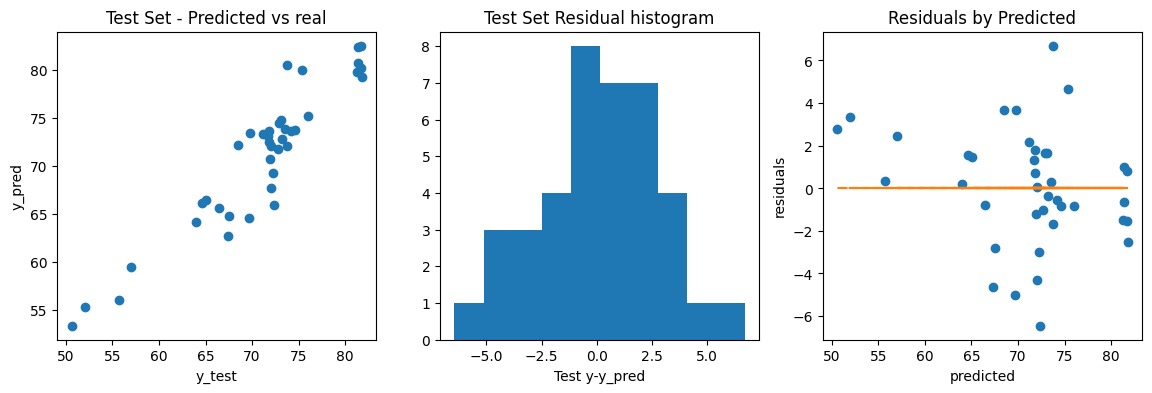

In [324]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y6_pred, y6_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")
 

ax[1].hist(y6_test - y6_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y6_pred,y6_test - y6_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y6_pred,np.zeros(len(y6_pred)),linestyle='dashed')

## Error metrics (X6, y6)

In [325]:
print(mse(y6_test,y6_pred))
print(mae(y6_test,y6_pred))

7.270205419384692
2.1038788082599478


In [326]:
R2_6=r2_score(y6_test,y6_pred)
R2_6

0.8631167848532488

## Cross validation (X6, y6)

In [327]:
scores6=cross_val_score(model6, X6_train, y6_train, cv = 10)
scores6

array([0.57332311, 0.78670785, 0.92748137, 0.84657263, 0.7809253 ,
       0.80873308, 0.89898269, 0.79390672, 0.84949177, 0.77874665])

In [328]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores6.mean(), scores6.std()))

0.80 accuracy with a standard deviation of 0.09


# Plotting cross validation scores comparatively

In [335]:
scores = []

In [338]:
scores.append(scores1.mean())
scores.append(scores2.mean())
scores.append(scores3.mean())
scores.append(scores4.mean())
scores.append(scores5.mean())
scores.append(scores6.mean())
len(scores)

6

In [339]:
scores

[0.801670081823981,
 0.8016700818239755,
 0.8647385728051755,
 0.739049380288104,
 0.8427282373405035,
 0.8044871179652497]

In [352]:
score_names = []

In [353]:
score_names.append('LR')
score_names.append('LR/RFE')
score_names.append('KNN')
score_names.append('DT')
score_names.append('RF')
score_names.append('RF/FE')

In [354]:
score_names

['LR', 'LR/RFE', 'KNN', 'DT', 'RF', 'RF/FE']

In [355]:
scores_dic = {'model': score_names, 'score': scores}

In [356]:
scores_df = pd.DataFrame(scores_dic)

In [357]:
scores_df

,model,score
0,LR,0.801670
1,LR/RFE,0.801670
2,KNN,0.864739
3,DT,0.739049
4,RF,0.842728
5,RF/FE,0.804487


<AxesSubplot:title={'center':'Cross Validation Score per Regression Model'}, xlabel='model', ylabel='score'>

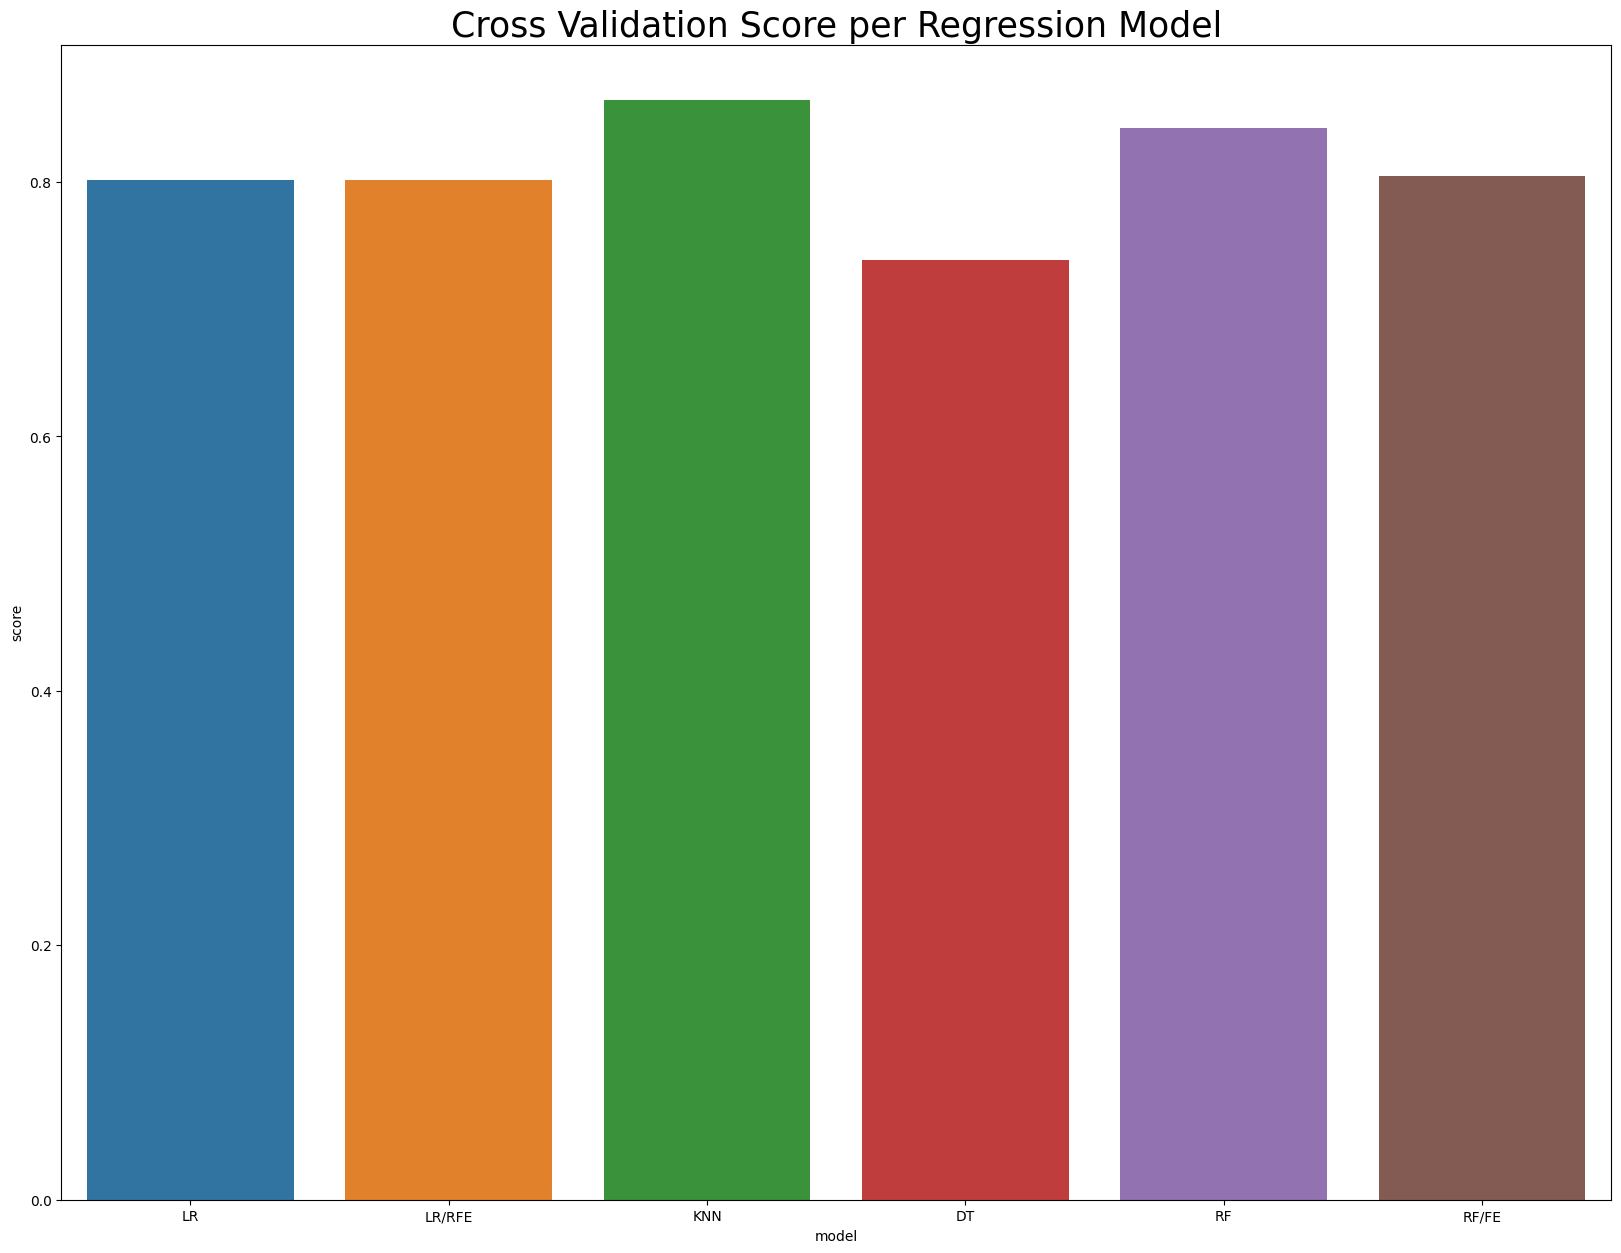

In [366]:
plt.figure(figsize=(20,15))
plt.title('Cross Validation Score per Regression Model', size='25',)

sns.barplot(x = scores_df['model'],y = scores_df['score'])